# 데이터 임포트 및 전처리

#### 데이터 임포트 

In [ ]:
import pandas as pd
dat1 = pd.read_csv("C:\\Users\\com\\Downloads\\user_spec.csv")
dat2 = pd.read_csv("C:\\Users\\com\\Downloads\\loan_result.csv")

In [ ]:
dat2 = pd.read_csv("C:\\Users\\jihun\\Downloads\\loan_result.csv")

#### user_spec 데이터 정리

In [ ]:
len(dat1)

1394216

In [ ]:
from pandasql import *
q = "SELECT * FROM dat1 WHERE application_id IN (SELECT DISTINCT application_id FROM dat2)"
dat1=sqldf(q,locals())

# 타겟 데이터가 있는 loan_result 데이터(dat2)에 없는 application_id는 사실상 무의미한 데이터이므로 user_spec(dat1)에서 삭제.

In [ ]:
len(dat1)
# 무의미한 application_id가 있는 행들이 삭제됨.

968753

In [ ]:
dat1.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
3,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
4,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,0.0,NaN,1.0,20000000.0


#### 타겟 데이터 분리

In [ ]:
target=dat2[dat2['is_applied'].isnull()==1]
# is_applied가 결측치인 값 (타겟) 분리

In [ ]:
target

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [ ]:
target=e=pd.merge(dat1,target,on='application_id',how='inner')

In [ ]:
target
# 추후에 예측 목표인 타겟 데이터 생성.

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:28,29,20,50000000.0,6.9,NaN
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:05,14,128,20000000.0,6.9,NaN
2,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:23,34,215,5000000.0,14.9,NaN
3,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:05,32,56,15000000.0,13.9,NaN
4,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,0.0,NaN,1.0,27000000.0,2022-06-07 14:29:26,55,186,43000000.0,11.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257234,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,46,49,3000000.0,16.7,NaN
3257235,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:55,42,258,3000000.0,15.1,NaN
3257236,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,5,194,6000000.0,11.7,NaN
3257237,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,...,0.0,NaN,3.0,202000000.0,2022-06-21 21:13:56,54,235,7000000.0,16.5,NaN


In [ ]:
import os
os.chdir("C:\\Users\\com\\Downloads")

target.to_csv("target.csv",index=False,encoding="utf-8-sig")

# 타겟 데이터 저장.

In [ ]:
dat2.dropna(subset='is_applied',inplace=True)
# 타겟 데이터를 train데이터에서 분리

In [ ]:
dat2.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
13285,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0
13286,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0
13287,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0
13288,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0


In [ ]:
dat1.to_csv("dat1.csv",index=False)

In [ ]:
dat2.to_csv("dat2.csv",index=False)

In [ ]:
import pandas as pd
dat1 = pd.read_csv("C:\\Users\\com\\Downloads\\dat1.csv")

In [ ]:
dat2 = pd.read_csv("C:\\Users\\com\\Downloads\\dat2.csv")

In [ ]:
dat2.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
1,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0
2,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0
3,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0
4,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0


## user_spec 데이터의 결측치 처리

In [ ]:
dat1.isnull().sum()

application_id                              0
user_id                                     0
birth_year                               8593
gender                                   8593
insert_time                                 0
credit_score                            81769
yearly_income                               1
income_type                                 0
company_enter_month                     92314
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
dtype: int64

### 생년, 성별 결측치 처리

In [ ]:
# 데이터의 크기가 크므로, 각 데이터를 병합하기 전에 user_spec 데이터의 결측치를 먼저 처리하고자 함.
# user_spec데이터에 loan_result, log_data가 병합될 예정이므로, 지금 결측치를 처리하지 않으면 병합하면서 양이 더 늘어나 처리하는데 시간이 더 쇼요됨.

In [ ]:
dat1[dat1['birth_year'].isnull()==1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
171,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
353,1093354,77317,NaN,NaN,2022-03-29 14:06:02,540.0,6000000.0,EARNEDINCOME2,202107.0,계약직,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN
620,954344,364670,NaN,NaN,2022-03-19 21:05:28,950.0,10000000.0,PRIVATEBUSINESS,202005.0,정규직,기타가족소유,20000000.0,사업자금,NaN,NaN,NaN,NaN
716,2100576,744785,NaN,NaN,2022-03-29 16:44:04,740.0,34000000.0,EARNEDINCOME,202109.0,정규직,기타가족소유,40000000.0,기타,NaN,NaN,NaN,NaN
757,503482,218561,NaN,NaN,2022-05-06 09:17:05,660.0,42000000.0,EARNEDINCOME2,202110.0,정규직,기타가족소유,15000000.0,LIVING,NaN,NaN,6.0,30000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968327,1496444,239255,NaN,NaN,2022-04-27 01:07:48,NaN,30000000.0,FREELANCER,202204.0,기타,전월세,7000000.0,생활비,0.0,0.0,NaN,NaN
968333,1824869,433763,NaN,NaN,2022-04-27 13:40:54,NaN,24000000.0,OTHERINCOME,NaN,기타,전월세,24000000.0,대환대출,0.0,NaN,NaN,NaN
968375,471527,397914,NaN,NaN,2022-04-27 00:47:58,520.0,28000000.0,EARNEDINCOME,202202.0,정규직,기타가족소유,12000000.0,생활비,0.0,NaN,5.0,15000000.0
968468,809359,570962,NaN,NaN,2022-04-18 23:15:37,880.0,24000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,1.0,NaN


In [ ]:
dat1[dat1['user_id']==49072]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
171,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
185611,484786,49072,1985.0,0.0,2022-04-14 13:35:34,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
282019,858081,49072,1985.0,0.0,2022-03-03 17:55:59,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
290359,1967101,49072,1985.0,0.0,2022-03-06 17:45:48,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
292236,2039732,49072,1985.0,0.0,2022-03-04 16:06:45,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
293085,1980587,49072,1985.0,0.0,2022-03-02 18:25:27,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
468319,1413604,49072,1985.0,0.0,2022-03-01 16:21:54,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,생활비,NaN,NaN,5.0,45000000.0
567750,2157845,49072,1985.0,0.0,2022-04-13 18:04:32,560.0,30000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,5.0,45000000.0


In [ ]:
# 같은 user_id 인데도, 생년과 성별이 비어있는 결측치들이 있다. 
# 따라서, 생년과 성별 결측치를 그 user_id에 해당하는 생년과 성별로 채워넣기로 결정.

In [ ]:
from pandasql import *
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE birth_year IS NULL)"""
birthnone=sqldf(q,locals())
# 생년이 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [ ]:
dat1 = dat1.dropna(subset='birth_year')
# 생년이 결측치인 데이터를 삭제. (결측치인 데이터들은 처리 뒤 추후 결합할 예정이므로, 중복을 피하고자 삭제.)

In [ ]:
len(birthnone)

11389

In [ ]:
birthnone.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
1,830231,417299,1971.0,1.0,2022-06-11 06:05:52,570.0,53000000.0,EARNEDINCOME,20220301.0,정규직,자가,25000000.0,생활비,0.0,NaN,32.0,127000000.0
2,1701527,504472,1987.0,1.0,2022-03-06 07:49:49,510.0,40000000.0,EARNEDINCOME,201808.0,정규직,전월세,40000000.0,대환대출,NaN,NaN,NaN,NaN
3,945516,182779,1988.0,1.0,2022-03-29 14:06:06,610.0,100000000.0,EARNEDINCOME2,201801.0,정규직,전월세,22000000.0,대환대출,NaN,NaN,44.0,213000000.0
4,1093354,77317,NaN,NaN,2022-03-29 14:06:02,540.0,6000000.0,EARNEDINCOME2,202107.0,계약직,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN


In [ ]:
birthnone[birthnone['user_id']==49072]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
2137,484786,49072,1985.0,0.0,2022-04-14 13:35:34,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
3168,858081,49072,1985.0,0.0,2022-03-03 17:55:59,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
3263,1967101,49072,1985.0,0.0,2022-03-06 17:45:48,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
3278,2039732,49072,1985.0,0.0,2022-03-04 16:06:45,560.0,31000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,생활비,NaN,NaN,5.0,45000000.0
3288,1980587,49072,1985.0,0.0,2022-03-02 18:25:27,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,대환대출,NaN,NaN,5.0,45000000.0
5388,1413604,49072,1985.0,0.0,2022-03-01 16:21:54,560.0,31000000.0,EARNEDINCOME2,201901.0,정규직,전월세,30000000.0,생활비,NaN,NaN,5.0,45000000.0
6512,2157845,49072,1985.0,0.0,2022-04-13 18:04:32,560.0,30000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,5.0,45000000.0


In [ ]:
bnonedata = birthnone[birthnone['birth_year'].isnull()==1]
# 생년이 결측치인 데이터들만 불러옴.
birthnone = birthnone[birthnone['birth_year'].isnull()==0]
# 그 뒤, 생년이 결측치인 데이터들을 제외.

In [ ]:
bnonedata=bnonedata.drop(columns=['birth_year','gender'])
# 일시적으로 생년, 성별 컬럼을 삭제.

In [ ]:
q="""SELECT user_id,birth_year,gender 
        FROM (SELECT DISTINCT user_id,birth_year,gender FROM birthnone)"""
d=sqldf(q,locals())
bnonedata=pd.merge(bnonedata,d,on='user_id')
# birthnone 데이터에서 생년,성별을 가져온 뒤, bnonedata와 조인.

In [ ]:
len(bnonedata)
# 총 1158개의 birth,gender의 결측치를 채워넣음. 나머지 4833개의 생년, 성별 결측치는 알 수 있는 방법이 없으므로 삭제하기로 결정.

1702

In [ ]:
dat1=pd.concat([dat1,bnonedata],axis=0,ignore_index=True)
# birth_year,gender의 결측치를 채워넣은 데이터를 원래 dat1과 조인.

In [ ]:
dat1.isnull().sum()

application_id                              0
user_id                                     0
birth_year                                  0
gender                                      0
insert_time                                 0
credit_score                            80582
yearly_income                               1
income_type                                 0
company_enter_month                     90994
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             414902
personal_rehabilitation_complete_yn    838345
existing_loan_cnt                      142890
existing_loan_amt                      221126
dtype: int64

### 신용점수 결측치 처리

In [ ]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE credit_score IS NULL)"""
creditnone=sqldf(q,locals())
# 신용점수가 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [ ]:
print(dat1['credit_score'].isnull().sum())
print(len(creditnone))

81769
106225


In [ ]:
dat1 = dat1.dropna(subset='credit_score')
# 신용점수가 결측치인 데이터를 삭제. 추후 결합 예정.

In [ ]:
creditnone.tail(15)

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
105010,564113,786564,1980.0,0.0,2022-06-22 12:01:40,NaN,26000000.0,EARNEDINCOME,20201201.0,정규직,전월세,45000000.0,생활비,0.0,NaN,NaN,NaN
105011,510953,734262,1971.0,1.0,2022-05-25 11:43:56,NaN,30000000.0,PRIVATEBUSINESS,200404.0,기타,전월세,20000000.0,생활비,0.0,0.0,NaN,NaN
105012,415617,523089,1970.0,1.0,2022-05-18 13:37:41,650.0,34000000.0,EARNEDINCOME,201306.0,정규직,자가,50000000.0,LIVING,NaN,NaN,NaN,NaN
105013,930467,155929,1980.0,1.0,2022-06-14 19:47:26,540.0,30000000.0,EARNEDINCOME,20210701.0,정규직,전월세,20000000.0,전월세보증금,0.0,NaN,3.0,37000000.0
105014,1945879,179265,1996.0,0.0,2022-04-20 11:49:02,520.0,34000000.0,EARNEDINCOME,201910.0,정규직,전월세,30000000.0,생활비,NaN,NaN,1.0,0.0
105015,665119,761271,1988.0,1.0,2022-06-17 15:41:57,980.0,53000000.0,PRACTITIONER,20210701.0,정규직,전월세,112000000.0,대환대출,0.0,0.0,1.0,112000000.0
105016,1863365,294686,1995.0,0.0,2022-06-11 01:04:03,710.0,50000000.0,EARNEDINCOME,20210901.0,계약직,전월세,100000000.0,대환대출,0.0,0.0,3.0,70000000.0
105017,307043,278409,1989.0,1.0,2022-05-22 02:46:16,830.0,45000000.0,EARNEDINCOME,201908.0,정규직,기타가족소유,20000000.0,생활비,0.0,0.0,6.0,78000000.0
105018,1676827,171786,1982.0,1.0,2022-04-08 11:22:06,920.0,56000000.0,EARNEDINCOME,202007.0,정규직,전월세,45000000.0,전월세보증금,NaN,NaN,NaN,NaN
105019,843525,863574,1959.0,1.0,2022-05-20 15:05:46,NaN,36000000.0,EARNEDINCOME,202105.0,정규직,자가,15000000.0,생활비,0.0,NaN,NaN,NaN


In [ ]:
creditnone[creditnone['user_id']==858775]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
73332,368073,858775,1996.0,0.0,2022-03-29 10:14:05,NaN,27000000.0,EARNEDINCOME,202108.0,정규직,전월세,5000000.0,생활비,NaN,NaN,2.0,43000000.0
105021,203848,858775,1996.0,0.0,2022-05-20 16:49:25,560.0,2000000.0,EARNEDINCOME,202108.0,정규직,전월세,5000000.0,생활비,0.0,NaN,2.0,43000000.0
105022,1573721,858775,1996.0,0.0,2022-05-22 12:30:54,530.0,2000000.0,EARNEDINCOME,202108.0,정규직,전월세,5000000.0,생활비,0.0,NaN,2.0,43000000.0


In [ ]:
# 생년, 성별과 똑같은 방법으로 결측치를 채우고자 하였으나 문제 발생.
# 유저의 신용점수가 시간에 따라 달라졌음. 
# 신용점수의 결측치를 각 유저별 가장 오래된 신용점수로 대체하기로 결정. (신용점수가 결측치라는 뜻은, 아직 신용점수를 조회를 안했다는 뜻.)
# (위의 데이터에서도 보이듯, 가장 처음에는 신용점수를 모르다가, 추후에 신용점수를 확인하였다.)

In [ ]:
creditnone[creditnone['user_id']==293792]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
71310,878089,293792,1959.0,1.0,2022-03-25 11:50:36,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN
73447,802327,293792,1959.0,1.0,2022-03-24 14:49:12,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN
75337,1338757,293792,1959.0,1.0,2022-03-23 13:06:55,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN
105020,1257826,293792,1959.0,1.0,2022-04-05 10:05:04,NaN,65000000.0,EARNEDINCOME,202110.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,NaN,NaN


In [ ]:
# credit_score는 대출 신청여부에 매우 큰 영향을 미칠 것이라고 판단하는 바, 이렇게 결측치만 있는 유저의 정보는 신용점수를 알아 낼
# 방법이 없으므로 삭제하기로 결정.

In [ ]:
a=creditnone[creditnone['credit_score'].isnull()==0]
q="""SELECT * FROM creditnone WHERE user_id NOT IN (SELECT user_id FROM a)"""
fullnone=sqldf(q,locals())
# 신용점수가 결측치만 있는 유저들만 따로 분리. (나중에 혹시 쓰일 수도 있으니 보관)

In [ ]:
len(a)
# 신용점수 결측치를 채워 넣을 수 있는 데이터의 수.

24443

In [ ]:
len(fullnone)
# 신용점수를 아예 몰라서 채워 넣을 수 없는 데이터의 수. 삭제예정.

68301

In [ ]:
q="""SELECT user_id,credit_score 
        FROM (SELECT user_id,credit_score,ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY insert_time) row_num FROM a)
        WHERE row_num=1"""
creditdata=sqldf(q,locals())
# 각 user_id의 신용점수들 중에서, 가장 날짜가 오래된 신용점수만을 추출.

In [ ]:
creditdata

,user_id,credit_score
0,41,650.0
1,48,620.0
2,215,660.0
3,269,730.0
4,298,570.0
...,...,...
7821,878949,690.0
7822,879040,580.0
7823,879077,920.0
7824,879143,530.0


In [ ]:
creditnone=creditnone.drop(columns='credit_score')
# 일시적으로 신용점수 컬럼을 삭제.

In [ ]:
creditnone=pd.merge(creditnone,creditdata,on='user_id')
# 신용점수를 위의 데이터의 신용점수로 채워넣음.

In [ ]:
creditnone

,application_id,user_id,birth_year,gender,insert_time,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,credit_score
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,870.0
1,54709,553686,1968.0,1.0,2022-05-19 13:49:42,30000000.0,PRIVATEBUSINESS,200702.0,정규직,기타가족소유,30000000.0,생활비,0.0,NaN,1.0,27000000.0,870.0
2,1456570,553686,1968.0,1.0,2022-05-02 19:36:21,30000000.0,PRIVATEBUSINESS,200702.0,정규직,기타가족소유,50000000.0,생활비,0.0,NaN,1.0,27000000.0,870.0
3,776612,553686,1968.0,1.0,2022-06-27 19:52:11,30000000.0,EARNEDINCOME2,20020215.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,870.0
4,1618808,93773,2001.0,1.0,2022-06-07 17:56:40,2000000.0,EARNEDINCOME2,20220301.0,계약직,기타가족소유,5000000.0,생활비,0.0,0.0,2.0,64000000.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36719,858161,378125,1983.0,1.0,2022-06-25 09:43:37,70000000.0,PRIVATEBUSINESS,20150101.0,정규직,전월세,12000000.0,대환대출,0.0,NaN,2.0,26000000.0,900.0
36720,925742,416018,1996.0,0.0,2022-06-10 16:39:46,6000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,생활비,0.0,NaN,9.0,34000000.0,580.0
36721,691075,416018,1996.0,0.0,2022-03-28 14:55:05,6000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,NaN,NaN,9.0,34000000.0,580.0
36722,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,0.0,NaN,NaN,NaN,500.0


In [ ]:
dat1=pd.concat([dat1,creditnone],axis=0,ignore_index=True)
# credit_score의 결측치를 채워넣은 데이터를 원래 dat1과 조인.

### 개인회생자 여부 결측치 처리

In [ ]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE personal_rehabilitation_complete_yn IS NULL)"""
prcnone=sqldf(q,locals())
# 개인회생자 납입 완료 여부(이하 prc)가 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [ ]:
dat1 = dat1.dropna(subset='personal_rehabilitation_complete_yn')

In [ ]:
len(prcnone)

857184

In [ ]:
prcnone[prcnone['personal_rehabilitation_complete_yn']==1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
1053,332122,675357,1975.0,0.0,2022-05-05 19:41:29,620.0,24000000.0,EARNEDINCOME,202107.0,정규직,기타가족소유,30000000.0,대환대출,1.0,1.0,4.0,33000000.0
1453,815168,675357,1975.0,0.0,2022-05-06 12:46:58,620.0,24000000.0,EARNEDINCOME2,202107.0,정규직,전월세,20000000.0,대환대출,1.0,1.0,4.0,33000000.0
2143,1157577,283815,1989.0,1.0,2022-05-31 12:01:58,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,3000000.0,생활비,1.0,1.0,1.0,10000000.0
3137,396977,183783,1971.0,1.0,2022-06-16 17:52:18,650.0,50000000.0,PRIVATEBUSINESS,20200601.0,정규직,전월세,5000000.0,사업자금,1.0,1.0,3.0,24000000.0
4152,78669,564828,1982.0,0.0,2022-06-10 10:44:39,550.0,79000000.0,FREELANCER,20180501.0,기타,자가,20000000.0,생활비,1.0,1.0,4.0,45000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845959,395695,123188,1967.0,1.0,2022-04-25 12:14:15,800.0,35000000.0,EARNEDINCOME,202201.0,계약직,전월세,10000000.0,생활비,1.0,1.0,1.0,24000000.0
846010,227764,600786,1969.0,0.0,2022-05-10 15:40:25,560.0,2000000.0,EARNEDINCOME,202105.0,계약직,자가,10000000.0,기타,1.0,1.0,1.0,13000000.0
851913,904036,673529,1988.0,0.0,2022-05-09 19:25:52,730.0,2000000.0,EARNEDINCOME,202103.0,정규직,전월세,2000000.0,투자,1.0,1.0,1.0,15000000.0
855536,1037830,520166,1980.0,1.0,2022-06-07 11:10:28,590.0,22000000.0,EARNEDINCOME,20220201.0,정규직,전월세,10000000.0,생활비,1.0,1.0,3.0,41000000.0


In [ ]:
prcnone[prcnone['user_id']==283815]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
2143,1157577,283815,1989.0,1.0,2022-05-31 12:01:58,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,3000000.0,생활비,1.0,1.0,1.0,10000000.0
100448,726373,283815,1989.0,1.0,2022-05-26 08:12:26,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,2000000.0,생활비,1.0,1.0,1.0,10000000.0
105982,1805526,283815,1989.0,1.0,2022-04-04 05:16:11,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,3000000.0,생활비,NaN,NaN,1.0,10000000.0
106307,80593,283815,1989.0,1.0,2022-03-29 10:05:57,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
106407,2104059,283815,1989.0,1.0,2022-03-30 10:08:38,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
166099,66158,283815,1989.0,1.0,2022-04-03 09:01:44,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
169436,1465280,283815,1989.0,1.0,2022-05-30 09:27:37,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,5000000.0,생활비,1.0,1.0,1.0,10000000.0
179296,1174512,283815,1989.0,1.0,2022-05-21 10:10:04,550.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,5000000.0,생활비,1.0,1.0,1.0,10000000.0
333445,1555083,283815,1989.0,1.0,2022-04-02 08:22:51,560.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,1000000.0,생활비,NaN,NaN,1.0,10000000.0
336990,1708898,283815,1989.0,1.0,2022-03-18 10:01:45,540.0,50000000.0,EARNEDINCOME,201801.0,정규직,전월세,2000000.0,생활비,NaN,NaN,1.0,10000000.0


In [ ]:
# 위의 데이터처럼, 개인회생자 납입을 하였음에도 불구하고, 결측치 처리가 되어 있는 유저들의 데이터가 있다.

In [ ]:
cnonedata = prcnone[prcnone['personal_rehabilitation_complete_yn'].isnull()==1]
# prc가 결측치인 데이터들만 불러옴.
prcnone = prcnone[prcnone['personal_rehabilitation_complete_yn'].isnull()==0]
# 그 뒤, prc가 결측치인 데이터들을 제외.

In [ ]:
prcyes = prcnone[prcnone['personal_rehabilitation_complete_yn']==1]
# prc가 1인 값들만 따로 저장

In [ ]:
prcno = prcnone[prcnone['personal_rehabilitation_complete_yn']==0]
# prc가 0인 값들만 따로 저장

In [ ]:
prcno

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
4,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,20151001.0,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
5,311143,646289,2000.0,1.0,2022-06-07 10:17:19,530.0,28000000.0,EARNEDINCOME,20220601.0,계약직,기타가족소유,3000000.0,생활비,0.0,0.0,5.0,19000000.0
8,1903409,168234,1990.0,0.0,2022-06-07 09:43:20,560.0,12000000.0,EARNEDINCOME2,20211001.0,기타,기타가족소유,3000000.0,생활비,0.0,0.0,10.0,23000000.0
21,1563352,706772,1991.0,0.0,2022-06-07 23:09:52,640.0,31000000.0,EARNEDINCOME,20200201.0,정규직,전월세,46000000.0,대환대출,0.0,0.0,4.0,49000000.0
23,1618808,93773,2001.0,1.0,2022-06-07 17:56:40,730.0,2000000.0,EARNEDINCOME2,20220301.0,계약직,기타가족소유,5000000.0,생활비,0.0,0.0,2.0,64000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914549,814527,546949,1979.0,1.0,2022-05-04 23:30:54,580.0,45000000.0,EARNEDINCOME,201405.0,정규직,전월세,20000000.0,생활비,0.0,0.0,4.0,64000000.0
914554,1470575,78605,1997.0,0.0,2022-06-01 16:16:00,630.0,30000000.0,EARNEDINCOME,202102.0,계약직,전월세,50000000.0,대환대출,0.0,0.0,6.0,65000000.0
914556,1036485,705738,1973.0,0.0,2022-04-21 22:00:06,810.0,27000000.0,EARNEDINCOME,202107.0,계약직,전월세,10000000.0,생활비,0.0,0.0,2.0,178000000.0
914572,1788126,427502,1986.0,0.0,2022-06-07 08:20:27,600.0,20000000.0,EARNEDINCOME,20220401.0,정규직,기타가족소유,18000000.0,대환대출,0.0,0.0,4.0,49000000.0


In [ ]:
cnonedata=cnonedata.drop(columns=['personal_rehabilitation_yn','personal_rehabilitation_complete_yn'])
# 일시적으로 pr, prc 컬럼을 삭제.

In [ ]:
q1="""SELECT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn 
        FROM (SELECT DISTINCT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn FROM prcyes)"""
q2="""SELECT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn 
        FROM (SELECT DISTINCT user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn FROM prcno)"""
prcyesdata=sqldf(q1,locals())
prcnodata=sqldf(q2,locals())
# prc가 1인 유저와 0인 유저들을 분리

In [ ]:
prcyesdata

,user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,675357,1.0,1.0
1,283815,1.0,1.0
2,183783,1.0,1.0
3,564828,1.0,1.0
4,613365,1.0,1.0
...,...,...,...
161,60910,1.0,1.0
162,116887,1.0,1.0
163,517415,1.0,1.0
164,123188,1.0,1.0


In [ ]:
prcnodata

,user_id,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,588743,0.0,0.0
1,646289,0.0,0.0
2,168234,0.0,0.0
3,706772,0.0,0.0
4,93773,0.0,0.0
...,...,...,...
15109,197887,0.0,0.0
15110,606285,1.0,0.0
15111,209021,0.0,0.0
15112,252417,0.0,0.0


In [ ]:
cnonedata

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,1.0,27000000.0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,5.0,15000000.0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,7.0,344000000.0
3,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,1.0,20000000.0
6,1754728,873333,1986.0,1.0,2022-06-07 21:16:55,940.0,30000000.0,PRIVATEBUSINESS,20210401.0,정규직,전월세,30000000.0,사업자금,3.0,46000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914606,858161,378125,1983.0,1.0,2022-06-25 09:43:37,900.0,70000000.0,PRIVATEBUSINESS,20150101.0,정규직,전월세,12000000.0,대환대출,2.0,26000000.0
914607,925742,416018,1996.0,0.0,2022-06-10 16:39:46,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,생활비,9.0,34000000.0
914608,691075,416018,1996.0,0.0,2022-03-28 14:55:05,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,9.0,34000000.0
914609,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,500.0,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,NaN,NaN


In [ ]:
prcyesdata=pd.merge(cnonedata,prcyesdata,on='user_id')
# prcyesdata 데이터에서 pr,prc가져온 뒤, cnonedata와 조인

In [ ]:
prcnodata=pd.merge(cnonedata,prcnodata,on='user_id')
# prcnodata 데이터에서 pr,prc가져온 뒤, cnonedata와 조인

In [ ]:
prcnodata

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,1.0,20000000.0,1.0,0.0
1,1327638,860410,1976.0,1.0,2022-05-24 01:08:56,640.0,30000000.0,OTHERINCOME,NaN,기타,자가,30000000.0,생활비,1.0,20000000.0,1.0,0.0
2,260457,860410,1976.0,1.0,2022-05-27 16:55:40,700.0,50000000.0,OTHERINCOME,NaN,기타,자가,38000000.0,생활비,1.0,20000000.0,1.0,0.0
3,138597,860410,1976.0,1.0,2022-06-02 14:04:19,590.0,30000000.0,OTHERINCOME,NaN,기타,자가,10000000.0,생활비,1.0,20000000.0,1.0,0.0
4,863512,860410,1976.0,1.0,2022-05-23 18:01:41,640.0,50000000.0,OTHERINCOME,NaN,기타,자가,30000000.0,생활비,1.0,20000000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53048,1923354,640001,1999.0,0.0,2022-03-15 13:21:28,520.0,24000000.0,EARNEDINCOME,202105.0,정규직,전월세,1000000.0,생활비,4.0,11000000.0,0.0,0.0
53049,2163084,78605,1997.0,0.0,2022-03-11 11:29:15,630.0,30000000.0,EARNEDINCOME,202102.0,정규직,전월세,15000000.0,생활비,6.0,65000000.0,0.0,0.0
53050,1603558,705738,1973.0,0.0,2022-03-30 20:47:01,810.0,27000000.0,EARNEDINCOME,202107.0,계약직,전월세,30000000.0,대환대출,2.0,178000000.0,0.0,0.0
53051,147111,427502,1986.0,0.0,2022-04-12 21:47:36,600.0,20000000.0,FREELANCER,202012.0,기타,기타가족소유,15000000.0,생활비,4.0,49000000.0,0.0,0.0


In [ ]:
q="""SELECT * FROM cnonedata 
WHERE user_id NOT IN (SELECT DISTINCT user_id FROM prcyesdata) AND user_id NOT IN (SELECT DISTINCT user_id FROM prcnodata)"""
prcfullnone=sqldf(q,locals())
# 처음부터 pr,prc의 값을 아예 모르는 유저들의 데이터들을 따로 추출.
# 이들은 개인회생자에 해당이 안되는 사람으로 간주, 전부 0으로 대체.

In [ ]:
prcfullnone['personal_rehabilitation_yn']=0

In [ ]:
prcfullnone['personal_rehabilitation_complete_yn']=0

In [ ]:
prcfullnone

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,1.0,27000000.0,0,0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,5.0,15000000.0,0,0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,7.0,344000000.0,0,0
3,1754728,873333,1986.0,1.0,2022-06-07 21:16:55,940.0,30000000.0,PRIVATEBUSINESS,20210401.0,정규직,전월세,30000000.0,사업자금,3.0,46000000.0,0,0
4,323850,635098,1996.0,1.0,2022-06-07 10:42:45,590.0,27000000.0,EARNEDINCOME,20210701.0,정규직,기타가족소유,40000000.0,사업자금,2.0,52000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804394,858161,378125,1983.0,1.0,2022-06-25 09:43:37,900.0,70000000.0,PRIVATEBUSINESS,20150101.0,정규직,전월세,12000000.0,대환대출,2.0,26000000.0,0,0
804395,925742,416018,1996.0,0.0,2022-06-10 16:39:46,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,생활비,9.0,34000000.0,0,0
804396,691075,416018,1996.0,0.0,2022-03-28 14:55:05,580.0,6000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,9.0,34000000.0,0,0
804397,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,500.0,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,NaN,NaN,0,0


In [ ]:
dat1=pd.concat([dat1,prcyesdata],axis=0,ignore_index=True)
dat1=pd.concat([dat1,prcnodata],axis=0,ignore_index=True)
dat1=pd.concat([dat1,prcfullnone],axis=0,ignore_index=True)
# pr,prc의 결측치를 채워넣은 데이터를 원래 dat1과 조인.

In [ ]:
dat1.isnull().sum()

application_id                              0
user_id                                     0
birth_year                                  0
gender                                      0
insert_time                                 0
credit_score                                0
yearly_income                               1
income_type                                 0
company_enter_month                     84201
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                       88701
existing_loan_amt                      168124
dtype: int64

In [ ]:
dat1.dropna(subset='yearly_income',inplace=True)
# 연간 수입이 결측치인 1개의 데이터 삭제.

### 기대출 수 결측치 처리

In [ ]:
dat1['existing_loan_cnt'].isnull().sum()

146290

In [ ]:
dat1.describe()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
count,9.868230e+05,986823.000000,986823.000000,986823.000000,986823.000000,9.868230e+05,8.935810e+05,9.868230e+05,986823.000000,986823.000000,841435.000000,7.611670e+05
mean,1.083742e+06,440088.722545,1982.818744,0.675528,672.880831,4.483201e+07,4.942545e+06,3.549430e+07,0.010882,0.001446,4.500047,7.639642e+07
std,6.258397e+05,254139.747891,10.600131,0.468177,110.360769,1.259314e+08,8.499936e+06,1.946574e+08,0.103750,0.038000,4.017071,9.714717e+07
min,1.000000e+00,9.000000,1930.000000,0.000000,60.000000,0.000000e+00,1.911090e+05,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.412190e+05,220077.000000,1976.000000,0.000000,600.000000,2.600000e+07,2.019010e+05,7.000000e+06,0.000000,0.000000,2.000000,2.300000e+07
50%,1.084030e+06,440870.000000,1984.000000,1.000000,650.000000,3.500000e+07,2.021060e+05,2.000000e+07,0.000000,0.000000,4.000000,4.600000e+07
75%,1.625968e+06,660115.000000,1991.000000,1.000000,720.000000,5.000000e+07,2.022040e+05,3.000000e+07,0.000000,0.000000,6.000000,8.900000e+07
max,2.167826e+06,879697.000000,2003.000000,1.000000,1000.000000,1.000000e+10,2.022063e+07,1.000000e+10,1.000000,1.000000,229.000000,7.512000e+09


In [ ]:
dat1['existing_loan_cnt'].unique()

array([  1.,   5.,   7.,  nan,   3.,   2.,  10.,   6.,   8.,   4.,  15.,
        12.,  11.,  22.,   9.,  21.,  14.,  32.,  44.,  23.,  16.,  13.,
        25.,  70.,  17.,  20.,  24.,  76.,  50.,  18.,  27.,  35.,  48.,
        19.,  38.,  79.,  41.,  33.,  31.,  84.,  45.,  26.,  30.,  28.,
        43.,  34.,  97., 109.,  39.,  29.,  40.,  58.,  42.,  86., 103.,
        60.,  59.,  37.,  55.,  53.,  36.,  51.,  54.,  47.,  49., 157.,
        62.,  57., 178.,  63., 117., 107.,  46.,  61.,  89.,  69.,  96.,
        52.,  75.,  56.,  85.,  74.,  66., 229.,  81.,  72., 128.,  73.,
        65., 106.,  67., 156., 125.])

In [ ]:
# 기대출 수의 값의 분포를 보면, 0은 없고 1부터 시작한다. 즉, 결측치의 값은 0으로 대체해야 할 것으로 보인다.
# 즉, 기대출이 아예 없는 사람들.

In [ ]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE existing_loan_cnt IS NULL)"""
exloannone=sqldf(q,locals())
# 기대출수가 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [ ]:
exloannone

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,20151001.0,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,None,None
1,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,20090101.0,정규직,전월세,22000000.0,대환대출,0.0,NaN,None,None
2,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaN,기타,자가,50000000.0,기타,0.0,NaN,None,None
3,1630680,814925,1984.0,1.0,2022-06-07 09:42:38,660.0,55000000.0,EARNEDINCOME,20210601.0,정규직,자가,30000000.0,대환대출,0.0,NaN,None,None
4,1036265,558745,1986.0,0.0,2022-06-07 17:20:08,NaN,48000000.0,EARNEDINCOME,20121001.0,정규직,자가,280000000.0,주택구입,0.0,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146285,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,201408.0,정규직,전월세,50000000.0,생활비,NaN,NaN,None,None
146286,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,202201.0,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,None,None
146287,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,기타,NaN,NaN,None,None
146288,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,None,None


In [ ]:
len(exloannone)

146290

In [ ]:
# 기대출 수가 결측치인 값을 포함하는 유저의 데이터의 수가 결측치의 수와 같다. 즉, 이 사람들은 처음부터 기대출이 있었던 적이 없었다는 뜻이다.
# 따라서, 기대출 수와 기대출 금액의 결측치 값을 전부 0으로 바꾸어도 무방하다.

In [ ]:
exloannone['existing_loan_cnt'].fillna(0,inplace=True)
exloannone['existing_loan_amt'].fillna(0,inplace=True)
# 기대출 수와 기대출 금액의 결측치 값을 전부 0으로 교체

In [ ]:
dat1.dropna(subset='existing_loan_cnt',inplace=True)
dat1=pd.concat([dat1,exloannone],axis=0,ignore_index=True)
# 기대출 수가 결측치 였던 값들을 제외 한 뒤, 결측치를 처리한 데이터들과 다시 결합.

In [ ]:
dat1.isnull().sum()

application_id                             0
user_id                                    0
birth_year                                 0
gender                                     0
insert_time                                0
credit_score                               0
yearly_income                              0
income_type                                0
company_enter_month                    84200
employment_type                            0
houseown_type                              0
desired_amount                             0
purpose                                    0
personal_rehabilitation_yn                 0
personal_rehabilitation_complete_yn        0
existing_loan_cnt                          0
existing_loan_amt                      79423
dtype: int64

In [ ]:
# dat1.to_csv("dd1.csv",index=False)

### 기대출 금액 결측치 처리

In [ ]:
q="""SELECT * FROM dat1 WHERE user_id IN (SELECT user_id FROM dat1 WHERE existing_loan_amt IS NULL)"""
examtnone=sqldf(q,locals())
# 기대출 금액이 결측치인 값을 보유한 user_id의 데이터를 전부 불러옴.

In [ ]:
examtnone

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1806891,866473,1986.0,0.0,2022-04-20 17:09:36,630.0,48000000.0,EARNEDINCOME,200804.0,정규직,기타가족소유,90000000.0,대환대출,0.0,0.0,1.0,None
1,986668,438246,1989.0,1.0,2022-06-07 11:23:55,830.0,37000000.0,EARNEDINCOME,20180501.0,정규직,기타가족소유,10000000.0,생활비,0.0,0.0,1.0,None
2,1612531,85001,1997.0,1.0,2022-06-07 22:28:29,830.0,26000000.0,EARNEDINCOME,20210801.0,정규직,기타가족소유,100000000.0,주택구입,0.0,0.0,1.0,None
3,1919715,440880,1995.0,1.0,2022-04-24 13:59:54,850.0,20000000.0,EARNEDINCOME,202101.0,정규직,기타가족소유,80000000.0,생활비,0.0,0.0,1.0,None
4,2012604,242069,1989.0,1.0,2022-05-06 16:26:25,830.0,44000000.0,EARNEDINCOME,202112.0,정규직,전월세,45000000.0,대환대출,0.0,0.0,1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79418,1696726,542771,1972.0,1.0,2022-03-01 11:14:09,970.0,40000000.0,EARNEDINCOME,201710.0,정규직,자가,20000000.0,생활비,0.0,0.0,1.0,None
79419,2028696,159187,1995.0,1.0,2022-03-02 17:18:03,750.0,20000000.0,FREELANCER,202112.0,기타,기타가족소유,1000000.0,생활비,0.0,0.0,1.0,None
79420,525788,159187,1995.0,1.0,2022-03-04 15:15:47,750.0,20000000.0,FREELANCER,202112.0,기타,기타가족소유,1000000.0,생활비,0.0,0.0,1.0,None
79421,1959108,59636,1970.0,1.0,2022-04-24 10:40:39,710.0,40000000.0,EARNEDINCOME,202201.0,일용직,전월세,5000000.0,생활비,0.0,0.0,1.0,None


In [ ]:
# 기대출 금액 역시 결측치인 값을 보유한 유저의 수가 결측치의 수와 같다. 따라서 기대출 금액을 구할 방법이 없다.
# 문제는 이 유저들은 전부 기대출 수가 1이라는 것인데, 기대출이 남아있다는 뜻은 금액도 남아있다는 뜻이다. 
# 기대출 금액은 개개인마다 편차가 매우 심하고, 대출 신청 여부에 영향을 미칠 가능성도 높다고 생각되는 바, 구할 방법이 없는 기대출 금액의
# 결측치 항은 삭제를 하기로 결정.

In [ ]:
dat1.dropna(subset='existing_loan_amt',inplace=True)

In [ ]:
dat1.isnull().sum()

application_id                             0
user_id                                    0
birth_year                                 0
gender                                     0
insert_time                                0
credit_score                               0
yearly_income                              0
income_type                                0
company_enter_month                    84924
employment_type                            0
houseown_type                              0
desired_amount                             0
purpose                                    0
personal_rehabilitation_yn                 0
personal_rehabilitation_complete_yn        0
existing_loan_cnt                          0
existing_loan_amt                          0
dtype: int64

### 입사년월 결측치 처리

In [ ]:
# 입사년월의 결측치 같은 경우에는, 설령 그 유저의 정보를 통해서 이전 입사년월 데이터를 얻어 올 수 있다고 하더라도, 
# 그 뒤에 퇴사를 한 뒤 다시 입사를 하였다던가, 그 뒤로 아직 입사를 하지 않은 경우 등 여러가지 변수가 존재하는 바, 결측치 항을 없애기로 결정.

In [ ]:
dat1.dropna(subset='company_enter_month',inplace=True)

In [ ]:
dat1.isnull().sum()

application_id                         0
user_id                                0
birth_year                             0
gender                                 0
insert_time                            0
credit_score                           0
yearly_income                          0
income_type                            0
company_enter_month                    0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
dtype: int64

In [ ]:
dat1

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
1,311143,646289,2000.0,1.0,2022-06-07 10:17:19,530.0,28000000.0,EARNEDINCOME,20220601.0,계약직,기타가족소유,3000000.0,생활비,0.0,0.0,5.0,19000000.0
2,1903409,168234,1990.0,0.0,2022-06-07 09:43:20,560.0,12000000.0,EARNEDINCOME2,20211001.0,기타,기타가족소유,3000000.0,생활비,0.0,0.0,10.0,23000000.0
3,223654,325066,1984.0,0.0,2022-06-07 16:39:55,570.0,26000000.0,EARNEDINCOME,20200401.0,정규직,전월세,5000000.0,생활비,0.0,0.0,5.0,58000000.0
4,1563352,706772,1991.0,0.0,2022-06-07 23:09:52,640.0,31000000.0,EARNEDINCOME,20200201.0,정규직,전월세,46000000.0,대환대출,0.0,0.0,4.0,49000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763070,1568709,162737,1985.0,1.0,2022-03-30 09:04:11,690.0,1000000.0,PRIVATEBUSINESS,201810.0,기타,전월세,30000000.0,LIVING,0.0,0.0,0.0,0.0
763071,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,전월세,5000000.0,생활비,0.0,0.0,0.0,0.0
763072,142542,257179,1985.0,0.0,2022-06-21 13:34:51,620.0,30000000.0,EARNEDINCOME,20170801.0,정규직,전월세,5000000.0,생활비,0.0,0.0,0.0,0.0
763073,1781560,866226,1967.0,1.0,2022-05-30 15:47:31,500.0,36000000.0,EARNEDINCOME,202104.0,정규직,전월세,30000000.0,생활비,0.0,0.0,0.0,0.0


## 데이터 통합

In [ ]:
dat = pd.merge(dat1,dat2,on='application_id',how='inner')
# user_spec 데이터와 loan_result 데이터를 통합

In [ ]:
dat.isnull().sum()

application_id                            0
user_id                                   0
birth_year                                0
gender                                    0
insert_time                               0
credit_score                              0
yearly_income                             0
income_type                               0
company_enter_month                       0
employment_type                           0
houseown_type                             0
desired_amount                            0
purpose                                   0
personal_rehabilitation_yn                0
personal_rehabilitation_complete_yn       0
existing_loan_cnt                         0
existing_loan_amt                         0
loanapply_insert_time                     0
bank_id                                   0
product_id                                0
loan_limit                             4219
loan_rate                              4219
is_applied                      

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8227296 entries, 0 to 8227295
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   user_id                              int64  
 2   birth_year                           float64
 3   gender                               float64
 4   insert_time                          object 
 5   credit_score                         float64
 6   yearly_income                        float64
 7   income_type                          object 
 8   company_enter_month                  float64
 9   employment_type                      object 
 10  houseown_type                        object 
 11  desired_amount                       float64
 12  purpose                              object 
 13  personal_rehabilitation_yn           float64
 14  personal_rehabilitation_complete_yn  float64
 15  existing_loan_cnt               

In [ ]:
dat

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,202110.0,기타,...,0.0,0.0,3.0,76000000.0,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,202110.0,기타,...,0.0,0.0,3.0,76000000.0,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,201908.0,정규직,...,1.0,0.0,2.0,64000000.0,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,202105.0,정규직,...,0.0,0.0,2.0,28000000.0,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,202105.0,정규직,...,0.0,0.0,2.0,28000000.0,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227291,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-03 18:58:33,7,220,7000000.0,14.5,0.0
8227292,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-03 18:58:33,21,196,3000000.0,13.0,1.0
8227293,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,201708.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-03 18:58:33,56,5,6000000.0,15.9,0.0
8227294,179711,866226,1967.0,1.0,2022-04-01 10:50:50,500.0,36000000.0,EARNEDINCOME,202101.0,정규직,...,0.0,0.0,0.0,0.0,2022-04-01 10:50:52,49,39,8000000.0,16.1,0.0


### 대출 한도, 대출 이자율 결측치 처리

In [ ]:
# 대출 한도나 이자율 같은 경우에는 은행사에서 제공하지 않은, 즉 무시해도 좋은 데이터라고 명시되어있기에, 결측치 제거.

In [ ]:
dat.dropna(subset='loan_limit',inplace=True)

In [ ]:
dat.dropna(subset='loan_rate',inplace=True)

In [ ]:
dat.isnull().sum()

application_id                         0
user_id                                0
birth_year                             0
gender                                 0
insert_time                            0
credit_score                           0
yearly_income                          0
income_type                            0
company_enter_month                    0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
loanapply_insert_time                  0
bank_id                                0
product_id                             0
loan_limit                             0
loan_rate                              0
is_applied                             0
dtype: int64

In [ ]:
# 모든 결측치 처리 완료.

## 데이터 정리

In [ ]:
df=dat.drop_duplicates()
# 가끔 중복데이터가 보였기에, 중복 데이터를 제거.

### 생년 데이터를 나이 데이터로 변경.

In [ ]:
dat['insert_time']=pd.to_datetime(dat['insert_time'])

In [ ]:
dat['insert_time']

0         2022-04-20 01:23:09
1         2022-04-20 01:23:09
2         2022-04-20 16:13:06
3         2022-04-24 16:37:52
4         2022-04-24 16:37:52
                  ...        
8227291   2022-04-03 18:58:31
8227292   2022-04-03 18:58:31
8227293   2022-04-03 18:58:31
8227294   2022-04-01 10:50:50
8227295   2022-04-01 10:50:50
Name: insert_time, Length: 8223077, dtype: datetime64[ns]

In [ ]:
age=dat['insert_time'].dt.year-dat['birth_year']
# 대출 당시의 날짜에서 생년을 빼서 대출 당시의 나이를 구함.

In [ ]:
age.describe()

count    8.223077e+06
mean     3.927656e+01
std      9.454650e+00
min      1.900000e+01
25%      3.200000e+01
50%      3.900000e+01
75%      4.600000e+01
max      8.900000e+01
dtype: float64

In [ ]:
age.head()

0    43.0
1    43.0
2    46.0
3    22.0
4    22.0
dtype: float64

In [ ]:
age.tail()

8227291    37.0
8227292    37.0
8227293    37.0
8227294    55.0
8227295    55.0
dtype: float64

In [ ]:
age//10*10

0          40.0
1          40.0
2          40.0
3          20.0
4          20.0
           ... 
8227291    30.0
8227292    30.0
8227293    30.0
8227294    50.0
8227295    50.0
Length: 8223077, dtype: float64

In [ ]:
dat['age']=(age//10*10).astype('int').astype('category')
# 나이를 10으로 나눈 몫*10을 함으로써 나이대별(10대,20대,등등..)으로 나이를 구분한 뒤, 카테고리형으로 바꿈.

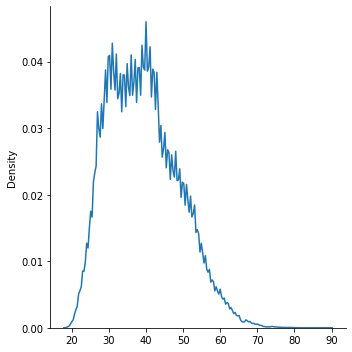

In [ ]:
import seaborn as sns
sns.displot(age,kind='kde')

C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

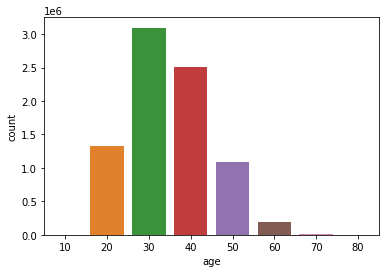

In [ ]:
sns.countplot(dat['age'])

In [ ]:
pd.crosstab(dat['age'],dat['is_applied'])

is_applied,0.0,1.0
age,,
10,884,255
20,1203536,96485
30,2889172,144148
40,2337297,125091
50,1013176,53568
60,172949,13432
70,12202,1609
80,272,100


### 입사년월 데이터를 이용하여 근무일 수 데이터 추출.

In [ ]:
company_enter_month=dat['company_enter_month'].astype('str').str[0:6]+'01'
# 어떤 데이터들은 일수까지 적혀있는 데이터가 있어, 날짜 데이터의 길이나 형식이 일정하지 않았다.
# 따라서, 먼저 월까지 데이터를 자른 뒤, 그 뒤에 01을 더해 입사 연,월,일 데이터를 생성하였다.

In [ ]:
dat['company_enter_month']=pd.to_datetime(company_enter_month)
# 그 뒤, 날짜형식으로 변경

In [ ]:
dat.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,3.0,76000000.0,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0,1,40
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,3.0,76000000.0,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0,1,40
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,2019-08-01,정규직,...,2.0,64000000.0,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0,1,40
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2.0,28000000.0,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0,1,20
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2.0,28000000.0,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0,1,20


In [ ]:
dat['work_time']=(dat['insert_time']-dat['company_enter_month']).dt.days
# 대출신청날짜에서 입사날짜를 빼, 근무일수 컬럼을 새로 생성.

### 근무일 수 데이터 정리

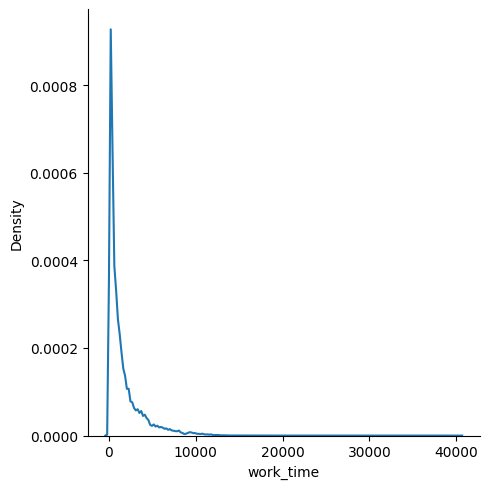

In [ ]:
sns.displot(dat['work_time'],kind='kde')

In [ ]:
# 30000일...까지는 장수한다면 가능하다고 할 수도 있을 수도 있겠지만.. 40000일은 누가봐도 명백한 이상치이다. (사람이라면...)
# 근무 일수에 대한 이상치 처리가 필요할 것으로 보인다.

In [ ]:
dat[dat['work_time']>20000]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,age,work_time
2252437,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:55:03,8,31,47000000.0,5.2,0.0,40,39253
2252438,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,55,12,29000000.0,10.3,0.0,40,39253
2252439,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,29,265,33000000.0,5.8,0.0,40,39253
2252440,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,50,142,44000000.0,11.2,0.0,40,39253
2252441,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,EARNEDINCOME,1914-11-01,정규직,...,1.0,23000000.0,2022-04-21 20:54:43,10,149,29000000.0,12.4,0.0,40,39253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093053,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,4,268,84000000.0,3.7,0.0,50,36522
9093054,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,46,227,150000000.0,10.7,0.0,50,36522
9093055,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:41,27,176,70000000.0,11.9,0.0,50,36522
9093056,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:40,52,187,3000000.0,6.2,0.0,50,36522


In [ ]:
# 이상한 데이터들의 원인을 살펴보니, 생년보다 입사한 날짜가 빠른, 이상하게 기입된 데이터들 때문으로 보인다.
# 따라서 이러한 데이터들을 삭제하고자 한다.

1943.0

In [ ]:
dat[dat['company_enter_month'].dt.year<dat['birth_year']]
# 입사년도가 생년보다 빠르게 기입되어 있는, 잘못 기입되어 있는 데이터들이 궁금하여 살펴보았다.

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,age,work_time
212085,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:16,55,25,18000000.0,13.1,0.0,20,17190
212086,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:15,19,231,50000000.0,14.3,0.0,20,17190
212087,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:36,34,215,8000000.0,15.9,0.0,20,17190
212088,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:16,42,216,10000000.0,14.3,0.0,20,17190
212089,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,PRIVATEBUSINESS,1975-05-01,계약직,...,4.0,181000000.0,2022-05-24 13:46:16,32,56,15000000.0,15.8,0.0,20,17190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093053,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,4,268,84000000.0,3.7,0.0,50,36522
9093054,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:29,46,227,150000000.0,10.7,0.0,50,36522
9093055,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:41,27,176,70000000.0,11.9,0.0,50,36522
9093056,963323,729866,1966.0,1.0,2022-04-28 12:53:27,650.0,95000000.0,EARNEDINCOME,1922-05-01,정규직,...,0.0,0.0,2022-04-28 12:53:40,52,187,3000000.0,6.2,0.0,50,36522


In [ ]:
# 데이터 기입좀 제대로 좀.. 태어나기 전부터 입사가 결정된건가..

In [ ]:
dat=dat[dat['company_enter_month'].dt.year>dat['birth_year']]
# 이상한 데이터를 제거하였다.

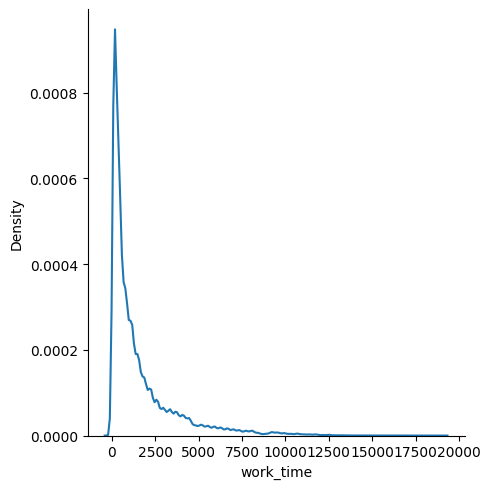

In [ ]:
sns.displot(dat['work_time'],kind='kde')

In [ ]:
# 한가지 또 이상한 점을 발견하였는데, work_time,즉 근무일 수가 음수인 경우이다.
# 이 뜻은 입사년도가 대출일시보다 늦었다는 뜻인데, 대출신청당시에 미래에 입사가 확정되어 있는 경우라고 볼 수도 있겠지만,
# 주관적인 판단은 분석에 영향을 미쳐서는 안된다고 생각하기에, 안전하게 이러한 데이터들도 삭제하기로 결정하였다.

In [ ]:
dat=dat[dat['work_time']>0]
# 근무시간이 음수인 이상한 데이터들을 삭제하였다.

In [ ]:
dat[dat['work_time']>17500]
# 호기심삼아 근무시간이 매우 큰 데이터들을 살펴보았다.

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,age,work_time
1209495,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:39:10,29,20,40000000.0,8.4,1.0,60,18685
1209496,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:52,42,258,3000000.0,12.9,0.0,60,18685
1209497,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:53,44,8,3000000.0,14.6,0.0,60,18685
1209498,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:52,57,71,3000000.0,12.9,0.0,60,18685
1209499,1589697,774024,1957.0,1.0,2022-03-30 11:38:51,780.0,65000000.0,PRIVATEBUSINESS,1971-02-01,계약직,...,7.0,202000000.0,2022-03-30 11:38:52,19,231,20000000.0,15.0,0.0,60,18685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626468,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,29,265,40000000.0,6.8,0.0,60,19022
8626469,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,52,234,36000000.0,5.0,0.0,60,19022
8626470,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,36,60,20000000.0,13.4,0.0,60,19022
8626471,824588,636824,1961.0,1.0,2022-03-30 23:36:05,650.0,40000000.0,EARNEDINCOME2,1970-03-01,일용직,...,0.0,0.0,2022-03-30 23:36:06,42,216,10000000.0,10.5,0.0,60,19022


In [ ]:
# 61년생이 70년에 10살 때 입사해서 지금까지 평생 일을 해 오신.. 현대에서 보면 이상하다고 생각 되는 데이터이지만 당시 시대 상황상
# 그랬을 수도 있으니 그대로 두기로 한다.

In [ ]:
dat['work_time'] = dat['work_time']/365
# 근무일수의 단위를 연으로 바꿈.

In [ ]:
dat['work_time']

0          0.550685
1          0.550685
2          2.720548
3          0.980822
4          0.980822
             ...   
8064171    4.673973
8064172    4.673973
8064173    4.673973
8064174    1.246575
8064175    1.246575
Name: work_time, Length: 8064176, dtype: float64

### 재직기간에 따른 분류

In [ ]:
# 은행사에서 알아보니, 재직기간에 따라서 상품의 개수가 달라진다고 함.
# 보통 재직 1개월 이내, 6개월 이내, 12개월(1년) 이상인 사람들의 상품이 다르다고 함. 따라서 이 기준을 바탕으로 분류.

In [ ]:
bins = [0,1/12,0.5,1,100]

In [ ]:
labels = [0,1,2,3]

In [ ]:
dat['work_rank']=pd.cut(dat['work_time'],bins,right=False,labels=labels)

In [ ]:
pd.crosstab(dat['work_rank'],dat['is_applied'])[1]/pd.crosstab(dat['work_rank'],dat['is_applied'])[0]

work_rank
0    0.124340
1    0.088748
2    0.053307
3    0.050107
dtype: float64

<AxesSubplot:xlabel='work_rank', ylabel='loan_rate'>

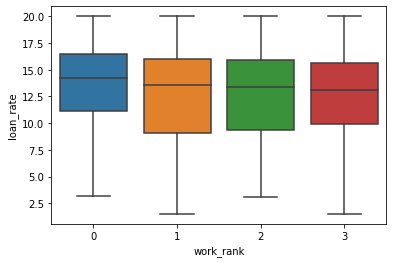

In [ ]:
import seaborn as sns
sns.boxplot(x='work_rank',y='loan_rate',data=dat)

<AxesSubplot:xlabel='loan_limit', ylabel='work_rank'>

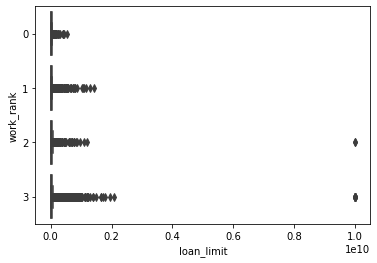

In [ ]:
sns.boxplot(x='loan_limit',y='work_rank',data=dat)

### 기대출 금액, 기대출 개수 처리 아이디어

In [ ]:
# 보통, 연간수입보다 기대출 금액이 2배 이상인 경우를 기대출 과다자 라고 부름.
# 따라서, 기대출이 전혀 없는 사람, 기대출이 있지만 소액인 사람, 기대출 과다인 사람으로 3가지로 분류하고자 함.

In [ ]:
dat['exloan']=0

In [ ]:
dat.loc[dat['existing_loan_cnt']>0,'exloan']=1

In [ ]:
dat.loc[dat['existing_loan_amt']>2*dat['yearly_income'],'exloan']=2

In [ ]:
ex=pd.crosstab(dat['exloan'],dat['is_applied'])

In [ ]:
ex[1]/ex[0]
# 기대출 과다자, 기대출이 있는 사람의 대출 신청 비율이 기대출이 없는 사람보다도 더 높다.

exloan
0    0.043357
1    0.059791
2    0.058502
dtype: float64

<AxesSubplot:xlabel='exloan', ylabel='loan_rate'>

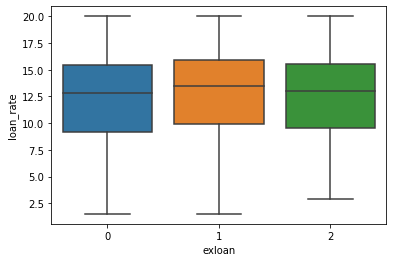

In [ ]:
import seaborn as sns
sns.boxplot(x='exloan',y='loan_rate',data=dat)

In [ ]:
dat

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0,1,40,0.550685,2
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0,1,40,0.550685,2
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,2019-08-01,정규직,...,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0,1,40,2.720548,3
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0,1,20,0.980822,2
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0,1,20,0.980822,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064171,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,정규직,...,2022-04-03 18:58:33,7,220,7000000.0,14.5,0.0,0,30,4.673973,3
8064172,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,정규직,...,2022-04-03 18:58:33,21,196,3000000.0,13.0,1.0,0,30,4.673973,3
8064173,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,정규직,...,2022-04-03 18:58:33,56,5,6000000.0,15.9,0.0,0,30,4.673973,3
8064174,179711,866226,1967.0,1.0,2022-04-01 10:50:50,500.0,36000000.0,EARNEDINCOME,2021-01-01,정규직,...,2022-04-01 10:50:52,49,39,8000000.0,16.1,0.0,0,50,1.246575,3


In [ ]:
dat.to_csv("dat.csv",index=False)

## 데이터의 이상치 처리 (참고용)

 이 밑에 있는 이상치 처리 항목들은 아직 이 단계에서는 처리하지 않기로 결정!!! 분포가 문제이기 때문에 로그변환등을 통해 정규분포와 최대 가까운 분포가 되도록 조정을 한 뒤에, 그럼에도 문제가 된다면 이상치 처리를 하기로 결정.

### 금액 관련 이상치 처리

In [ ]:
# 연봉이나 대출 금액 등, 이러한 돈과 관련된 부분들은 밑으로는 0원이 끝이지만, 위로는 한계가 없어 분포가 일부의 큰 값들로 인하여
# 심하게 왜곡되어 나타날 가능성이 높다. 따라서 매우 큰 값들에 대해서는 이상치를 판별하는 기준인 q3+1.5*iqr 값을 대입하기로 하였다.

#### 연간 수입 이상치 처리

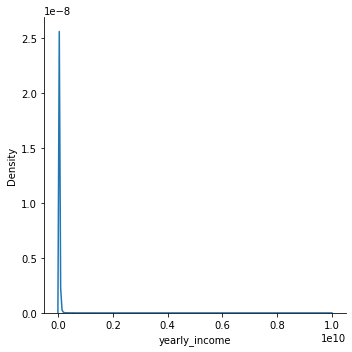

In [ ]:
import seaborn as sns
sns.displot(dat,x='yearly_income',kind='kde')

In [ ]:
# 연간 수입에서의 분포를 보면, 매우 높은 연간 수입을 가지는 데이터로 인하여 분석에 지장이 있을 것으로 보인다.
# 따라서, q3+1.5*iqr 보다 큰 값을 가지는 이상치들을 전부 q3+1.5*iqr 값으로 바꾸고자 한다.

In [ ]:
q1 = dat['yearly_income'].quantile(0.25)
q3 = dat['yearly_income'].quantile(0.75)
iqr = q3 - q1
print(q1-1.5*iqr)
print(q3+1.5*iqr)
# 연간 수입이 낮은쪽의 이상치는 없고, 연간 수입이 8000만원 이상인 사람들의 연간 수입만 8000만원으로 바꿔주기로 결정.

0.0
80000000.0


In [ ]:
dat.loc[dat['yearly_income']>q3+1.5*iqr,'yearly_income'] = (q3+1.5*iqr)
# 연간 수입 이상치 처리.

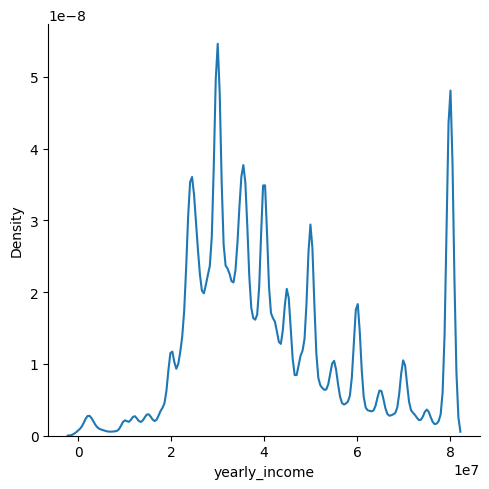

In [ ]:
sns.displot(dat,x='yearly_income',kind='kde')

#### 대출 희망 금액 이상치 처리

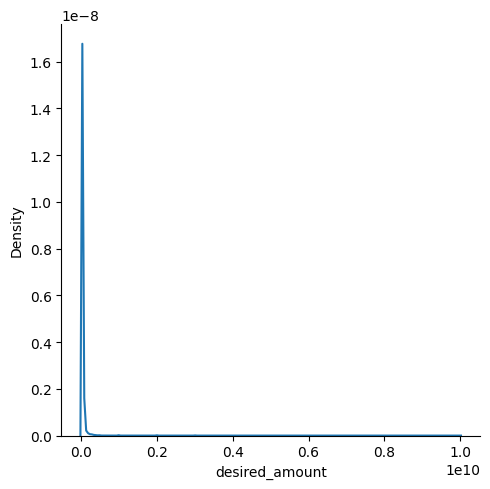

In [ ]:
sns.displot(dat,x='desired_amount',kind='kde')

In [ ]:
# 연간 수입과 마찬가지로, 값이 매우 큰 이상치들로 인하여 분석에 지장이 있을 것으로 보인다.
# 따라서, 동일한 방법으로 대체하기로 결정.

In [ ]:
q1 = dat['desired_amount'].quantile(0.25)
q3 = dat['desired_amount'].quantile(0.75)
iqr = q3 - q1
print(q1-1.5*iqr)
print(q3+1.5*iqr)
# 대출희망금액이 낮은쪽의 이상치는 없고, 대출희망금액이 1.1억원 이상인 사람들의 희망금액만 1.1억원으로 바꿔주기로 결정.

-50000000.0
110000000.0


In [ ]:
dat.loc[dat['desired_amount']>q3+1.5*iqr,'desired_amount'] = (q3+1.5*iqr)
# 대출 희망 금액 이상치 처리.

#### 대출 한도 금액 이상치 처리

In [ ]:
q1 = dat['loan_limit'].quantile(0.25)
q3 = dat['loan_limit'].quantile(0.75)
iqr = q3 - q1
print(q1-1.5*iqr)
print(q3+1.5*iqr)

-27000000.0
69000000.0


In [ ]:
dat.loc[dat['loan_limit']>q3+1.5*iqr,'loan_limit'] = (q3+1.5*iqr)

# 불필요해 보이는 데이터 컬럼 처리.

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213115 entries, 0 to 9214515
Data columns (total 27 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   application_id                       int64         
 1   user_id                              int64         
 2   birth_year                           float64       
 3   gender                               float64       
 4   insert_time                          datetime64[ns]
 5   credit_score                         float64       
 6   yearly_income                        float64       
 7   income_type                          object        
 8   company_enter_month                  datetime64[ns]
 9   employment_type                      object        
 10  houseown_type                        object        
 11  desired_amount                       float64       
 12  purpose                              object        
 13  personal_rehabilitation_yn 

In [ ]:
dat_d=dat.drop(columns=['application_id','user_id','birth_year','insert_time','company_enter_month','personal_rehabilitation_yn',
                 'bank_id','product_id','existing_loan_cnt','existing_loan_amt','loanapply_insert_time'])

In [ ]:
dat_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9199725 entries, 0 to 9214515
Data columns (total 16 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   gender                               float64 
 1   credit_score                         float64 
 2   yearly_income                        float64 
 3   income_type                          object  
 4   employment_type                      object  
 5   houseown_type                        object  
 6   desired_amount                       float64 
 7   purpose                              object  
 8   personal_rehabilitation_complete_yn  float64 
 9   loan_limit                           float64 
 10  loan_rate                            float64 
 11  is_applied                           float64 
 12  exloan                               int64   
 13  age                                  category
 14  work_time                            float64 
 15  work_rank      

In [ ]:
dat_d.corr()

,gender,credit_score,yearly_income,desired_amount,personal_rehabilitation_complete_yn,loan_limit,loan_rate,is_applied,exloan,work_time
gender,1.000000,0.076381,0.293662,0.093436,-0.001375,0.083710,0.013639,-0.009017,0.039797,0.081000
credit_score,0.076381,1.000000,0.236227,0.283123,-0.009774,0.275173,-0.197117,-0.156933,0.043383,0.135984
yearly_income,0.293662,0.236227,1.000000,0.362395,-0.010318,0.287984,0.004480,-0.039386,0.005615,0.449875
desired_amount,0.093436,0.283123,0.362395,1.000000,-0.011920,0.196674,-0.092293,-0.110802,-0.039017,0.169950
personal_rehabilitation_complete_yn,-0.001375,-0.009774,-0.010318,-0.011920,1.000000,-0.001484,-0.002793,0.002669,0.000783,-0.004374
loan_limit,0.083710,0.275173,0.287984,0.196674,-0.001484,1.000000,-0.045661,-0.035448,-0.128478,0.104076
loan_rate,0.013639,-0.197117,0.004480,-0.092293,-0.002793,-0.045661,1.000000,-0.060488,0.037226,-0.030385
is_applied,-0.009017,-0.156933,-0.039386,-0.110802,0.002669,-0.035448,-0.060488,1.000000,0.025384,-0.026328
exloan,0.039797,0.043383,0.005615,-0.039017,0.000783,-0.128478,0.037226,0.025384,1.000000,0.088386
work_time,0.081000,0.135984,0.449875,0.169950,-0.004374,0.104076,-0.030385,-0.026328,0.088386,1.000000


In [ ]:
import os
os.chdir("C:\\Users\\jihun\\Downloads")

dat_d.to_csv("dat_modified.csv",index=False)

In [ ]:
import pandas as pd
dat_d=pd.read_csv("C:\\Users\\com\\Downloads\\dat_modified.csv")

In [ ]:
#----------------------------------------------------------------------

In [ ]:
dat_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199725 entries, 0 to 9199724
Data columns (total 16 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   gender                               float64
 1   credit_score                         float64
 2   yearly_income                        float64
 3   income_type                          object 
 4   employment_type                      object 
 5   houseown_type                        object 
 6   desired_amount                       float64
 7   purpose                              object 
 8   personal_rehabilitation_complete_yn  float64
 9   loan_limit                           float64
 10  loan_rate                            float64
 11  is_applied                           float64
 12  exloan                               int64  
 13  age                                  int64  
 14  work_time                            float64
 15  work_rank                       